<a href="https://colab.research.google.com/github/ch00226855/CMP414765Spring2022/blob/main/Week10_NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 10
# Introduction to Neural Networks

Slides can be found [here](https://drive.google.com/file/d/1Ae5ancx-CW1eah51cNgKzfu87VDUTK_n/view?usp=sharing)

**Training large neural networks requires a lot of calculation.** Please turn on GPU computing from "Edit" -> "Notebook Setting" -> "Hardware Acceleration" before running the code below.

# Build a Classifier for Hand-Written Digits

Adapted from [TensorFlow tutorial](https://www.tensorflow.org/tutorials/quickstart/beginner)

1. Build a neural network that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

In [ ]:
# import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

TensorFlow version: 2.8.0


In [ ]:
# Load and prepare the MNIST dataset.
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert the data from integers to floating-point numbers
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


Shape of the image: (28, 28)


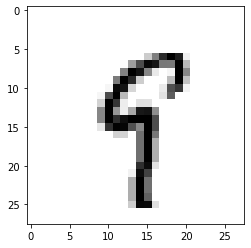

In [ ]:
# extract the first image in x_train
idx = 54321
img = x_train[idx, :, :] # : means that we include all indices
print("Shape of the image:", img.shape)
plt.imshow(img, cmap=plt.cm.binary)

In [ ]:
print("Shape of y_train:", y_train.shape)
y_train[idx]

Shape of y_train: (60000,)


9

As comparison, let's build a logistic regression model for this task.

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train.reshape([60000, 28*28]), y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Calculate the classification accuracy on the test set.
test_predictions = model_lr.predict(x_test.reshape([10_000, 28*28]))
print("The first 10 predictions:", test_predictions[:10])

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, test_predictions)
print("Test accuracy:", acc)

The first 10 predictions: [7 2 1 0 4 1 4 9 6 9]
Test accuracy: 0.9258


Now let's build a neural network model.

In [ ]:
# Build a neural network model by stacking layers.
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # convert a 28*28 matrix into a 784 1D array
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)                                   
])

In [ ]:
# For each example the model returns a vector of "logits", one for each class.
index = 123
predictions = model(x_train[index:(index+1)])
print(predictions)

tf.Tensor([[-0.339  0.051 -0.53   0.083  0.053 -0.235 -0.39   0.202 -0.334  0.083]], shape=(1, 10), dtype=float32)


In [ ]:
# The tf.nn.softmax function converts these logits to probabilities for each class
probs = tf.nn.softmax(predictions)
print(probs)

tf.Tensor([[0.079 0.117 0.065 0.121 0.117 0.088 0.075 0.136 0.08  0.121]], shape=(1, 10), dtype=float32)


In [ ]:
# The model makes prediction based on the largest probability
class_prediction = np.argmax(probs)
print(class_prediction)

7


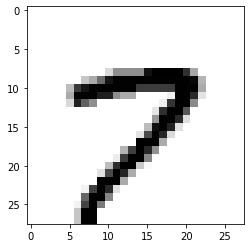

In [ ]:
# Visualize this image
plt.imshow(x_train[index].reshape([28, 28]), cmap=plt.cm.binary)

The prediction accuracy is low, since no training has been performed yet. Let's introduce a function that measures the prediction error.

In [ ]:
# Let's introduce a function that measures the prediction error.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[index:(index+1)], predictions).numpy()

1.9938906

In [ ]:
# Set up the training environment
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# The Model.fit method adjusts the model parameters to minimize the loss
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2316 - accuracy: 0.9318
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0956 - accuracy: 0.9711
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0667 - accuracy: 0.9793
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0521 - accuracy: 0.9834
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0403 - accuracy: 0.9872


In [ ]:
# The above loss and accuracy is for the training data. Let's evaluate the model on the test set.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0965 - accuracy: 0.9745


[0.09650686383247375, 0.9745000004768372]

The image classifier is now trained to ~98% accuracy on this dataset. Let's create a test case ourselves. For example, we can use MS Paint to draw a digit. Remember to resize the canvas to 28*28 pixels

Upload the image to Colab environment by clicking the "Upload to Session Storage" button in the File tab on the left.

In [ ]:
# import pillow for image transformation
import PIL
img = PIL.Image.open("Test4.png")
img = img.convert('1') # convert image to black and white
print(img.size)

(28, 28)


In [ ]:
img

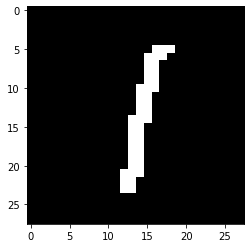

In [ ]:
# What values are contained in img by default?
img_processed = np.asarray(img).astype(float)
# print(img_processed)
plt.imshow(img_processed, cmap=plt.cm.binary)

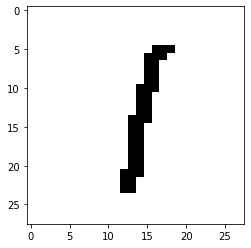

In [ ]:
# Switch black and white values
img_np = 1 - np.asarray(img).astype(float)
plt.imshow(img_np, cmap=plt.cm.binary)

In [ ]:
# Obtain predictions from the model
raw_prediction = model(img_np.reshape([-1, 28, 28])) # -1 is a placeholder
print(raw_prediction)

tf.Tensor(
[[-10.715   9.919  -4.984  -3.093  -2.864  -8.584  -7.868  -0.261   0.45
   -4.155]], shape=(1, 10), dtype=float32)


In [ ]:
# Convert the raw outputs (logits) into probabilities
probs = tf.nn.softmax(raw_prediction)
print(probs)

tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


In [ ]:
class_prediction = np.argmax(probs)
print(class_prediction)

1


In [ ]:
# Show the confusion matrix
from sklearn.metrics import confusion_matrix

In [ ]:
# y_test_pred = np.argmax(model(x_test).numpy())
y_test_pred = []
raw_predictions = model(x_test).numpy()
for row_idx in range(raw_predictions.shape[0]):
    logits = raw_predictions[row_idx, :]
    probs = tf.nn.softmax(logits).numpy()
    class_pred = np.argmax(probs)
    y_test_pred.append(class_pred)
print(y_test_pred)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 7, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 2, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 7, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
mat = confusion_matrix(y_test, y_test_pred)
print(mat)

[[ 958    0    5    0    1    5    1    5    1    4]
 [   0 1121    4    0    0    0    2    4    4    0]
 [   0    0 1014    4    1    0    3    6    4    0]
 [   0    0    5  992    0    0    0    4    4    5]
 [   0    0    5    0  957    0    3    7    1    9]
 [   1    0    0   17    1  849    5    3    9    7]
 [   2    3    3    1    3    5  939    0    2    0]
 [   0    0    9    3    0    0    0 1012    2    2]
 [   2    0    4    6    4    3    1   12  940    2]
 [   1    3    0    6   15    3    1   16    1  963]]


# Exercise: Are larger models better?
Modify the neural network model in one of the following ways:
1. Increate the number of neurons from 128 to 256.
2. Add another layer of 128 nodes.
Report the accuracy and the confusion matrix on the test set.



In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # convert a 28*28 matrix into a 784 1D array
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)                                   
])

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model2.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model2.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2044 - accuracy: 0.9380
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0886 - accuracy: 0.9727
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0651 - accuracy: 0.9798
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0504 - accuracy: 0.9837
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0376 - accuracy: 0.9887


In [ ]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1420 - accuracy: 0.9632


[0.1419553905725479, 0.9631999731063843]

**Conclusion:** Larger neural networks are not necessarily better.